In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from collections import defaultdict
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 500

In [2]:
def read_chexpertify_results(model_name, seed, project_dim):
    val_pred_df = pd.read_csv(f'chexpertify/{model_name}_val_pred_df_{project_dim}_{seed}.csv')
    val_true_df = pd.read_csv(f'chexpertify/{model_name}_val_true_df_{project_dim}_{seed}.csv')
    test_pred_df = pd.read_csv(f'chexpertify/{model_name}_test_pred_df_{project_dim}_{seed}.csv')
    test_true_df = pd.read_csv(f'chexpertify/{model_name}_test_true_df_{project_dim}_{seed}.csv')
    return val_pred_df, val_true_df, test_pred_df, test_true_df

def read_all_results():
    d = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict()))))
    dims = [128, 256]
    model_names = ['OneNearestNeighbor', 'OneNearestNeighborCoarse2Fine']
    seeds = [0]
    for model_name in model_names:
        for seed in seeds:
            for dim in dims:
                d['val']['pred'][model_name][seed][dim] = pd.read_csv(f'chexpertify/{model_name}_val_pred_df_{dim}_{seed}.csv')
                d['val']['true'][model_name][seed][dim] = pd.read_csv(f'chexpertify/{model_name}_val_true_df_{dim}_{seed}.csv')
                d['test']['pred'][model_name][seed][dim] = pd.read_csv(f'chexpertify/{model_name}_test_pred_df_{dim}_{seed}.csv')
                d['test']['true'][model_name][seed][dim] = pd.read_csv(f'chexpertify/{model_name}_test_true_df_{dim}_{seed}.csv')

    return d

In [3]:
def score_function(true, pred):
    t = true.iloc[:,:-1].copy().to_numpy().astype(np.int8)
    p = pred.iloc[:,:-1].copy().to_numpy().astype(np.int8)

    tp = np.count_nonzero(np.logical_and(t==1, p==1), axis=1)
    tn = np.count_nonzero(np.logical_and(t==0, p==0), axis=1)
    fp = np.count_nonzero(np.logical_and(t==0, p==1), axis=1)
    fn = np.count_nonzero(np.logical_and(t==1, p==0), axis=1)

    res = []
    for i in range(len(tp)):
        precision = tp[i] / (tp[i] + fp[i]) if tp[i] + fp[i] != 0 else 0
        recall = tp[i] / (tp[i] + fn[i]) if tp[i] + fn[i] != 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
        precision = np.round(precision, 4)
        recall = np.round(recall, 4)
        f1 = np.round(f1, 4)
        res.append([precision, recall, f1])

    res = np.array(res)
    df = pd.concat([true.iloc[:,-1], pred.iloc[:,-1]], axis=1)
    df = pd.concat([df, pd.DataFrame(res)], axis=1)
    df.columns = ['Ground_truth', 'Predicted', 'Precision', 'Recall', 'F1']
    return df

In [116]:
no_c2f_pred = res['val']['pred']['OneNearestNeighbor'][0][128]
c2f_pred = res['val']['pred']['OneNearestNeighborCoarse2Fine'][0][128]
true = res['val']['true']['OneNearestNeighborCoarse2Fine'][0][128]

,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,1->0 (1),1->0 (1),0->0 (1),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (1),0->0 (0),0->0 (1),1->0 (1),1->0 (1),0->1 (0),0->0 (0)
1,0->1 (1),0->1 (1),0->1 (1),0->0 (0),0->0 (0),0->1 (0),0->1 (0),0->1 (1),0->0 (0),0->1 (1),0->1 (1),1->1 (1),0->0 (0),0->0 (0)
2,1->1 (1),1->1 (1),1->1 (1),0->0 (0),0->1 (1),1->1 (1),1->1 (1),0->0 (1),0->0 (0),1->1 (1),1->1 (1),1->1 (1),0->0 (0),0->0 (0)
3,1->1 (1),1->1 (1),1->1 (1),0->0 (0),1->0 (1),1->0 (1),1->0 (1),1->1 (1),0->0 (0),1->1 (1),1->0 (1),1->1 (1),0->0 (0),0->0 (0)
4,1->1 (1),1->1 (1),1->1 (1),0->1 (0),1->1 (1),1->1 (1),1->1 (1),1->0 (1),0->0 (0),1->0 (1),0->0 (0),1->0 (1),0->1 (0),0->0 (0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,1->0 (1),1->0 (0),1->0 (1),0->0 (0),1->0 (0),0->0 (1),0->1 (1),0->0 (1),0->0 (0),0->0 (0),0->1 (0),1->1 (1),0->0 (0),0->1 (0)
2081,1->0 (1),1->0 (1),1->1 (1),0->1 (0),1->0 (1),1->1 (1),1->1 (1),0->1 (0),0->0 (0),0->0 (0),0->1 (0),0->1 (1),0->0 (0),0->0 (0)
2082,0->0 (1),0->0 (1),0->1 (1),0->1 (0),0->0 (1),0->1 (1),0->1 (1),0->1 (0),0->1 (0),0->1 (0),1->1 (0),1->1 (1),0->0 (0),1->0 (0)
2083,0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),0->0 (0),1->1 (1),1->1 (1),0->0 (0),1->1 (1)


In [144]:
def compare_df(split, seed, dim):
    res = read_all_results()
    no_c2f_true = res[split]['true']['OneNearestNeighbor'][seed][dim]
    no_c2f_pred = res[split]['pred']['OneNearestNeighbor'][seed][dim]
    c2f_true = res[split]['true']['OneNearestNeighborCoarse2Fine'][seed][dim]
    c2f_pred = res[split]['pred']['OneNearestNeighborCoarse2Fine'][seed][dim]
    
    change_log_df = (
        no_c2f_pred.iloc[:,:-1].astype(int).astype(str) + 
        '->' + 
        c2f_pred.iloc[:,:-1].astype(int).astype(str) + 
        ' (' + 
        no_c2f_true.iloc[:,:-1].astype(int).astype(str) + 
        ')'
    )

    no_c2f = score_function(
        no_c2f_true, 
        no_c2f_pred
    )

    c2f = score_function(
        c2f_true, 
        c2f_pred
    )

    df = pd.concat([no_c2f[['Ground_truth', 'Predicted']], c2f['Predicted'], no_c2f[['Precision', 'Recall', 'F1']], c2f[['Precision', 'Recall', 'F1']]], axis=1)
    df.columns = ['Ground_truth', 'No_C2F', 'C2F', 'No_C2F_P', 'No_C2F_R', 'No_C2F_F1', 'C2F_P', 'C2F_R', 'C2F_F1']
    return df, change_log_df

df, change_log_df = compare_df('val', 0, 128)
df['F1_diff'] = df['C2F_F1'] - df['No_C2F_F1']

In [152]:
df.iloc[10:11,:]

,Ground_truth,No_C2F,C2F,No_C2F_P,No_C2F_R,No_C2F_F1,C2F_P,C2F_R,C2F_F1,F1_diff
10,there is a moderatesized left pleural effusion which is increased in size from the prior ex in . there is no right pleural effusion . the lungs are clear without pulmonary edema consolidation or pneumothorax . a small calcified granuloma in the right lung zone is unchanged from prior exs . the cardiac size is mildly enlarged unchanged from prior exs . mediastinal contours are normal . the aorta is tortuous with mild calcifications . degenerative changes of the lower thoracic and upper lumbar...,there is again opacification at the left base with a small formation consistent with residual pleural effusion . the peripheral areas of opacification are essentially unchanged and may represent sequela of areas of as on the prior ct scans .,frontal and lateral chest radiographs demonstrate wellexpanded lungs . cardiomediastinal contour is within normal limits . focal opacities in the right mid and lower lung could represent infection . blunting of posterior costophrenic suggest small effusions . no pneumothorax . opacity projecting over the right costophrenic sulcus is thought to be external .,0.875,1.0,0.9333,1.0,1.0,1.0,0.0667


In [151]:
change_log_df.iloc[10,:]

Enlarged Cardiomediastinum    1->0 (0)
Cardiomegaly                  0->0 (0)
Lung Opacity                  1->1 (1)
Lung Lesion                   0->0 (0)
Edema                         0->0 (0)
Consolidation                 1->1 (1)
Pneumonia                     1->1 (1)
Atelectasis                   1->1 (1)
Pneumothorax                  0->0 (0)
Pleural Effusion              1->1 (1)
Pleural Other                 1->1 (1)
Fracture                      1->1 (1)
Support Devices               0->0 (0)
No Finding                    0->0 (0)
Name: 10, dtype: object

In [145]:
df[(df['F1_diff'] < 0.2) & (df['C2F_F1'] > 0.95)].sort_values('F1_diff', ascending=False).index.values

array([ 922,  343,   39, 2055,  209, 1186,  904, 1518, 1512,  803,  812,
       1831,  780,  882, 1241, 1248,   10,  364, 1449, 1453, 1454, 1315,
       1316, 1317, 1318, 1320, 1452, 1455, 1322, 1323, 1324, 1451, 1325,
       1326, 1313, 1456, 1328, 1304, 1261, 1467, 1460, 1459, 1297, 1298,
       1458, 1312, 1305, 1306, 1307, 1457, 1308, 1311, 1327, 1330, 1448,
       1439, 1431, 1433, 1434, 1435, 1436, 1438, 1440, 1418, 1441, 1442,
       1443, 1444, 1445, 1447, 1420, 1417, 1450, 1379, 1331, 1332, 1333,
       1353, 1376, 1378, 1260, 1416, 1381, 1382, 1383, 1401, 1402, 1412,
       1380, 1240, 1250, 1099, 1069, 1070, 1071, 1072, 1073, 1074, 1092,
       1100, 1113, 1101, 1102, 1104, 1105, 1106, 1108, 1109, 1068, 1067,
       1066, 1065, 1043, 1048, 1049, 1050, 1051, 1053, 1054, 1055, 1056,
       1057, 1059, 1061, 1062, 1063, 1064, 1112, 1114, 1249, 1204, 1173,
       1174, 1175, 1191, 1193, 1194, 1195, 1205, 1115, 1206, 1207, 1213,
       1221, 1226, 1227, 1473, 1164, 1163, 1162, 11

In [42]:
d = pd.read_csv('results/results_nlg.csv')

In [47]:
d[(d['Split'] == 'test')].groupby(['Model', 'Dim']).mean().drop(columns='Seed')

BLEU1     BLEU2     BLEU3     BLEU4  \
Model                         Dim                                            
OneNearestNeighbor            128   0.341035  0.184060  0.107683  0.067367   
                              256   0.341790  0.184909  0.108184  0.067626   
                              512   0.342181  0.185546  0.109253  0.068782   
                              1024  0.342810  0.186441  0.110106  0.069512   
                              2048  0.344410  0.187359  0.110501  0.069536   
                              4096  0.344796  0.187157  0.109872  0.068780   
                              8192  0.345409  0.188358  0.111155  0.070100   
OneNearestNeighborCoarse2Fine 128   0.341117  0.184298  0.107905  0.067700   
                              256   0.341548  0.184577  0.108017  0.067695   
                              512   0.340064  0.183656  0.107386  0.067290   
                              1024  0.342196  0.185395  0.108943  0.068618   
                              2048  0.341469  0.185432  0.109137  0.068910   
                              4096  0.342801  0.186431  0.109910  0.069008   
                              8192  0.343432  0.186682  0.110022  0.069591   

                                     ROGUE_L     CIDEr  
Model                         Dim                       
OneNearestNeighbor            128   0.233100  0.073174  
                              256   0.233864  0.077688  
                              512   0.233983  0.076773  
                              1024  0.234860  0.076947  
                              2048  0.234713  0.079888  
                              4096  0.234957  0.082270  
                              8192  0.235429  0.079682  
OneNearestNeighborCoarse2Fine 128   0.233656  0.071787  
                              256   0.233378  0.072945  
                              512   0.232930  0.069703  
                              1024  0.234185  0.072993  
                              2048  0.234192  0.073100  
                              4096  0.234116  0.073223  
                              8192  0.235152  0.076634

In [44]:
d.columns.values[-6:]

array(['BLEU1', 'BLEU2', 'BLEU3', 'BLEU4', 'ROGUE_L', 'CIDEr'],
      dtype=object)

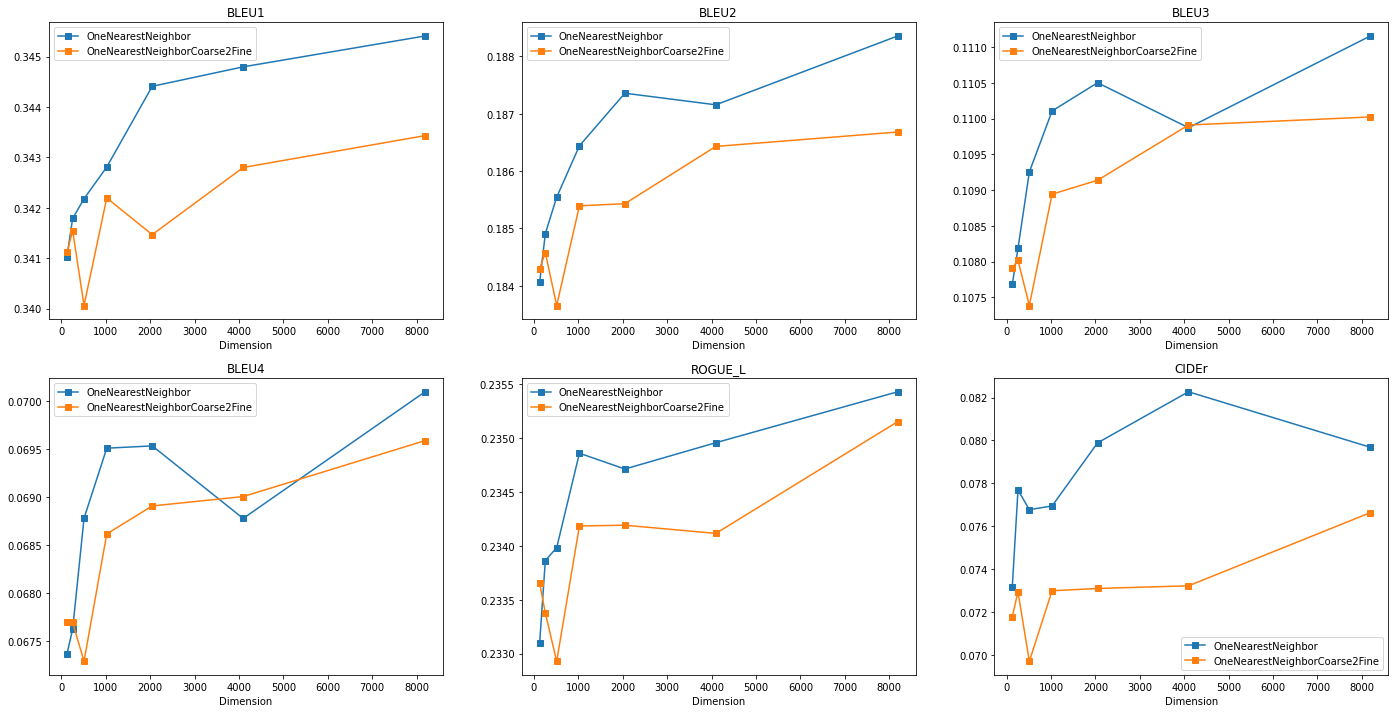

In [46]:
plt.figure(figsize=(24, 12))
i = 1
for metric in d.columns.values[-6:]:
    plt.subplot(2, 3, i)
    plt.xlabel('Dimension')
    for model in ['OneNearestNeighbor', 'OneNearestNeighborCoarse2Fine']:

        plt.title(metric)
        plt.plot(
            d[(d['Split'] == 'test') & (d['Model'] == model)].groupby('Dim').mean()[metric],
            label=model,
            linestyle='solid',
            marker='s',
        )
    i += 1
    plt.legend()
plt.show()